# Test notebook for the GitHub Sandbox

## Compute and visualize the Mandelbrot-set

INFO: Loading help data...


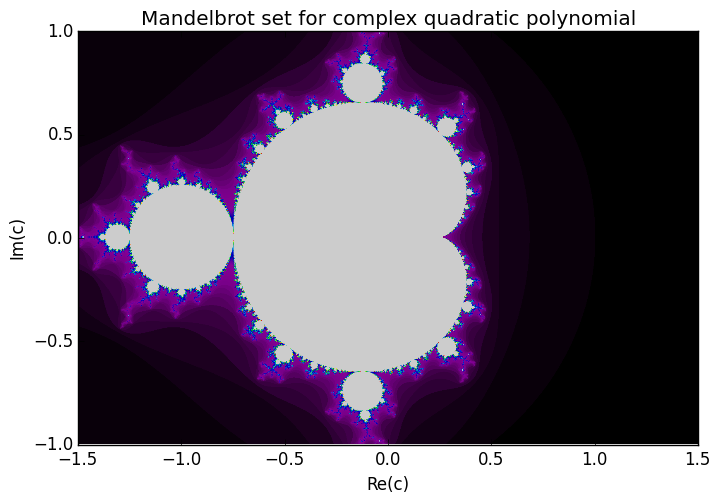

PyObject <matplotlib.text.Text object at 0x00000000319F7CC0>

In [1]:
using PyPlot  #this is Julia's wrapper around matplotlib (from Python) it behaves very similar to MATLAB

# compute the "speed of divergence" for point c and perturbation z
# the return value is small for perturbations that diverge fast, and large for non-divergent sequences
function julia(z, c; maxiter=200)
    #iterate through the complex quadratic polynomial
    for n = 1:maxiter
        z = z^2 + c         
        #check if sequence has "diverged"
        if abs2(z) > 4
            return n
        end
    end
    return maxiter #sequence has not diverged (yet)
end


#test call (should diverge, i.e. should return maxiter)
julia(complex(1,0),complex(0,0))

#setting up a "meshgrid" of complex points to test
#the construct below is called a "comprehension" in Julia
#it allows the construction of matrices of arbitrary dimension
#and simultaneously initialize them by evaluating a function for each element
pts = [complex(r,i) for i=1:-.002:-1, r=-1.5:.002:1.5]

#the function map evaluates a function on every element of a given matrix and returns the results as a matrix
#we use an anonymos function that takes x and calls julia(x,x)
mset = map(x->julia(x,x),pts)  #this call produces the Mandelbrot set

#finally visualize the set
imshow(mset, cmap="spectral", extent=[-1.5,1.5,-1,1])
xlabel("Re(c)")
ylabel("Im(c)")
title("Mandelbrot set for complex quadratic polynomial")

## Compute and visualize the Julia set

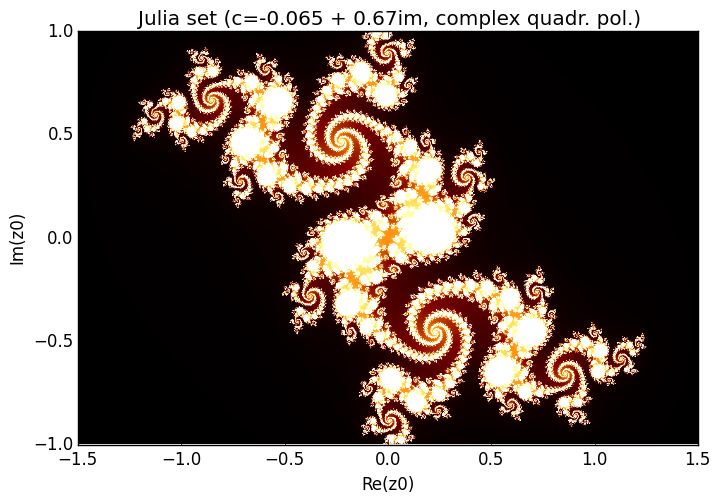

PyObject <matplotlib.text.Text object at 0x000000003245CA58>

In [5]:
#we could use our function julia directly in the comprehension
#this call produces the Julia set for c=-0.06+0.67im
c = complex(-0.065, 0.67)  #try changing this!

jset = [ julia(complex(r,i), c) for i=1:-.002:-1, r=-1.5:.002:1.5 ]; 

#this time with a different colormap
imshow(jset, cmap="afmhot", extent=[-1.5,1.5,-1,1])
xlabel("Re(z0)")
ylabel("Im(z0)")
title("Julia set (c=$c, complex quadr. pol.)")